In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/alexandrehsd/Predicting-Pulsar-Stars/master/pulsar_stars.csv')

# EDA

In [5]:
df.shape

(17898, 9)

In [4]:
df.head()

,Mean of the integrated profile,Standard deviation of the integrated profile,Excess kurtosis of the integrated profile,Skewness of the integrated profile,Mean of the DM-SNR curve,Standard deviation of the DM-SNR curve,Excess kurtosis of the DM-SNR curve,Skewness of the DM-SNR curve,target_class
0,140.562500,55.683782,-0.234571,-0.699648,3.199833,19.110426,7.975532,74.242225,0
1,102.507812,58.882430,0.465318,-0.515088,1.677258,14.860146,10.576487,127.393580,0
2,103.015625,39.341649,0.323328,1.051164,3.121237,21.744669,7.735822,63.171909,0
3,136.750000,57.178449,-0.068415,-0.636238,3.642977,20.959280,6.896499,53.593661,0
4,88.726562,40.672225,0.600866,1.123492,1.178930,11.468720,14.269573,252.567306,0


In [14]:
col_names = df.columns

col_names

Index([' Mean of the integrated profile',
       ' Standard deviation of the integrated profile',
       ' Excess kurtosis of the integrated profile',
       ' Skewness of the integrated profile', ' Mean of the DM-SNR curve',
       ' Standard deviation of the DM-SNR curve',
       ' Excess kurtosis of the DM-SNR curve', ' Skewness of the DM-SNR curve',
       'target_class'],
      dtype='object')

We can see that there are leading spaces (spaces at the start of the string name) in the dataframe. So, I will remove these leading spaces.

In [15]:
#removing leading spaces from column names

df.columns = df.columns.str.strip()

In [16]:
#Viewing the columns again

df.columns

Index(['Mean of the integrated profile',
       'Standard deviation of the integrated profile',
       'Excess kurtosis of the integrated profile',
       'Skewness of the integrated profile', 'Mean of the DM-SNR curve',
       'Standard deviation of the DM-SNR curve',
       'Excess kurtosis of the DM-SNR curve', 'Skewness of the DM-SNR curve',
       'target_class'],
      dtype='object')

We can see that the leading spaces are removed from the column name. But the column names are very long. So, I will make them short by renaming them.

In [17]:
# rename column names

df.columns = ['IP Mean', 'IP Sd', 'IP Kurtosis', 'IP Skewness', 'DM-SNR Mean', 'DM-SNR Sd', 'DM-SNR Kurtosis', 'DM-SNR Skewness', 'target_class']


In [19]:
#Viewing changed column names

df.columns

Index(['IP Mean', 'IP Sd', 'IP Kurtosis', 'IP Skewness', 'DM-SNR Mean',
       'DM-SNR Sd', 'DM-SNR Kurtosis', 'DM-SNR Skewness', 'target_class'],
      dtype='object')

We can see that the leading spaces are removed from the column name. But the column names are very long. So, I will make them short by renaming them.

In [20]:
#check distribution of target_class

df['target_class'].value_counts()

0    16259
1     1639
Name: target_class, dtype: int64

In [24]:
# view the percentage distribution of target_class column

df['target_class'].value_counts()/np.float64(len(df))

0    0.908426
1    0.091574
Name: target_class, dtype: float64

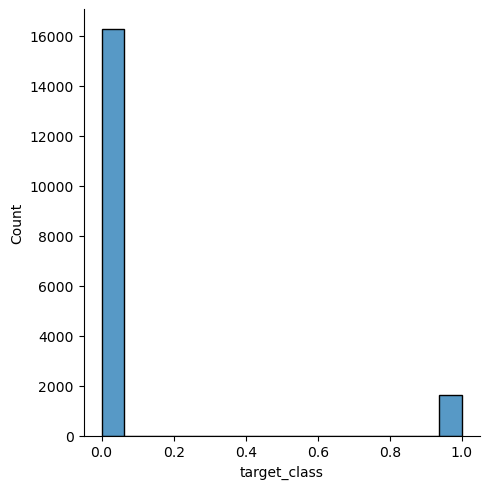

In [39]:
#Visualizing the distribution
sns.displot(x=df['target_class'])

In [9]:
#View Summary of dataset

print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17898 entries, 0 to 17897
Data columns (total 9 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0    Mean of the integrated profile                17898 non-null  float64
 1    Standard deviation of the integrated profile  17898 non-null  float64
 2    Excess kurtosis of the integrated profile     17898 non-null  float64
 3    Skewness of the integrated profile            17898 non-null  float64
 4    Mean of the DM-SNR curve                      17898 non-null  float64
 5    Standard deviation of the DM-SNR curve        17898 non-null  float64
 6    Excess kurtosis of the DM-SNR curve           17898 non-null  float64
 7    Skewness of the DM-SNR curve                  17898 non-null  float64
 8   target_class                                   17898 non-null  int64  
dtypes: float64(8), int64(1)
memory usage: 1.2 MB
None


In [12]:
#Checking for missing values

df.isnull().sum()

 Mean of the integrated profile                  0
 Standard deviation of the integrated profile    0
 Excess kurtosis of the integrated profile       0
 Skewness of the integrated profile              0
 Mean of the DM-SNR curve                        0
 Standard deviation of the DM-SNR curve          0
 Excess kurtosis of the DM-SNR curve             0
 Skewness of the DM-SNR curve                    0
target_class                                     0
dtype: int64

We can see that there are no missing values in the dataset and all the variables are numerical variables.

##### Summary of Variables

* There are 9 numerical variables in the dataset.
* 8 are continuous variables and 1 is discrete variable.
* The discrete variable is target_class variable. It is also the target variable.
* There are no missing values in the dataset.

In [41]:
#Checking for outliers

# View summary statistics in numerical variables

round(df.describe(),2)

,IP Mean,IP Sd,IP Kurtosis,IP Skewness,DM-SNR Mean,DM-SNR Sd,DM-SNR Kurtosis,DM-SNR Skewness,target_class
count,17898.00,17898.00,17898.00,17898.00,17898.00,17898.00,17898.00,17898.00,17898.00
mean,111.08,46.55,0.48,1.77,12.61,26.33,8.30,104.86,0.09
std,25.65,6.84,1.06,6.17,29.47,19.47,4.51,106.51,0.29
min,5.81,24.77,-1.88,-1.79,0.21,7.37,-3.14,-1.98,0.00
25%,100.93,42.38,0.03,-0.19,1.92,14.44,5.78,34.96,0.00
50%,115.08,46.95,0.22,0.20,2.80,18.46,8.43,83.06,0.00
75%,127.09,51.02,0.47,0.93,5.46,28.43,10.70,139.31,0.00
max,192.62,98.78,8.07,68.10,223.39,110.64,34.54,1191.00,1.00


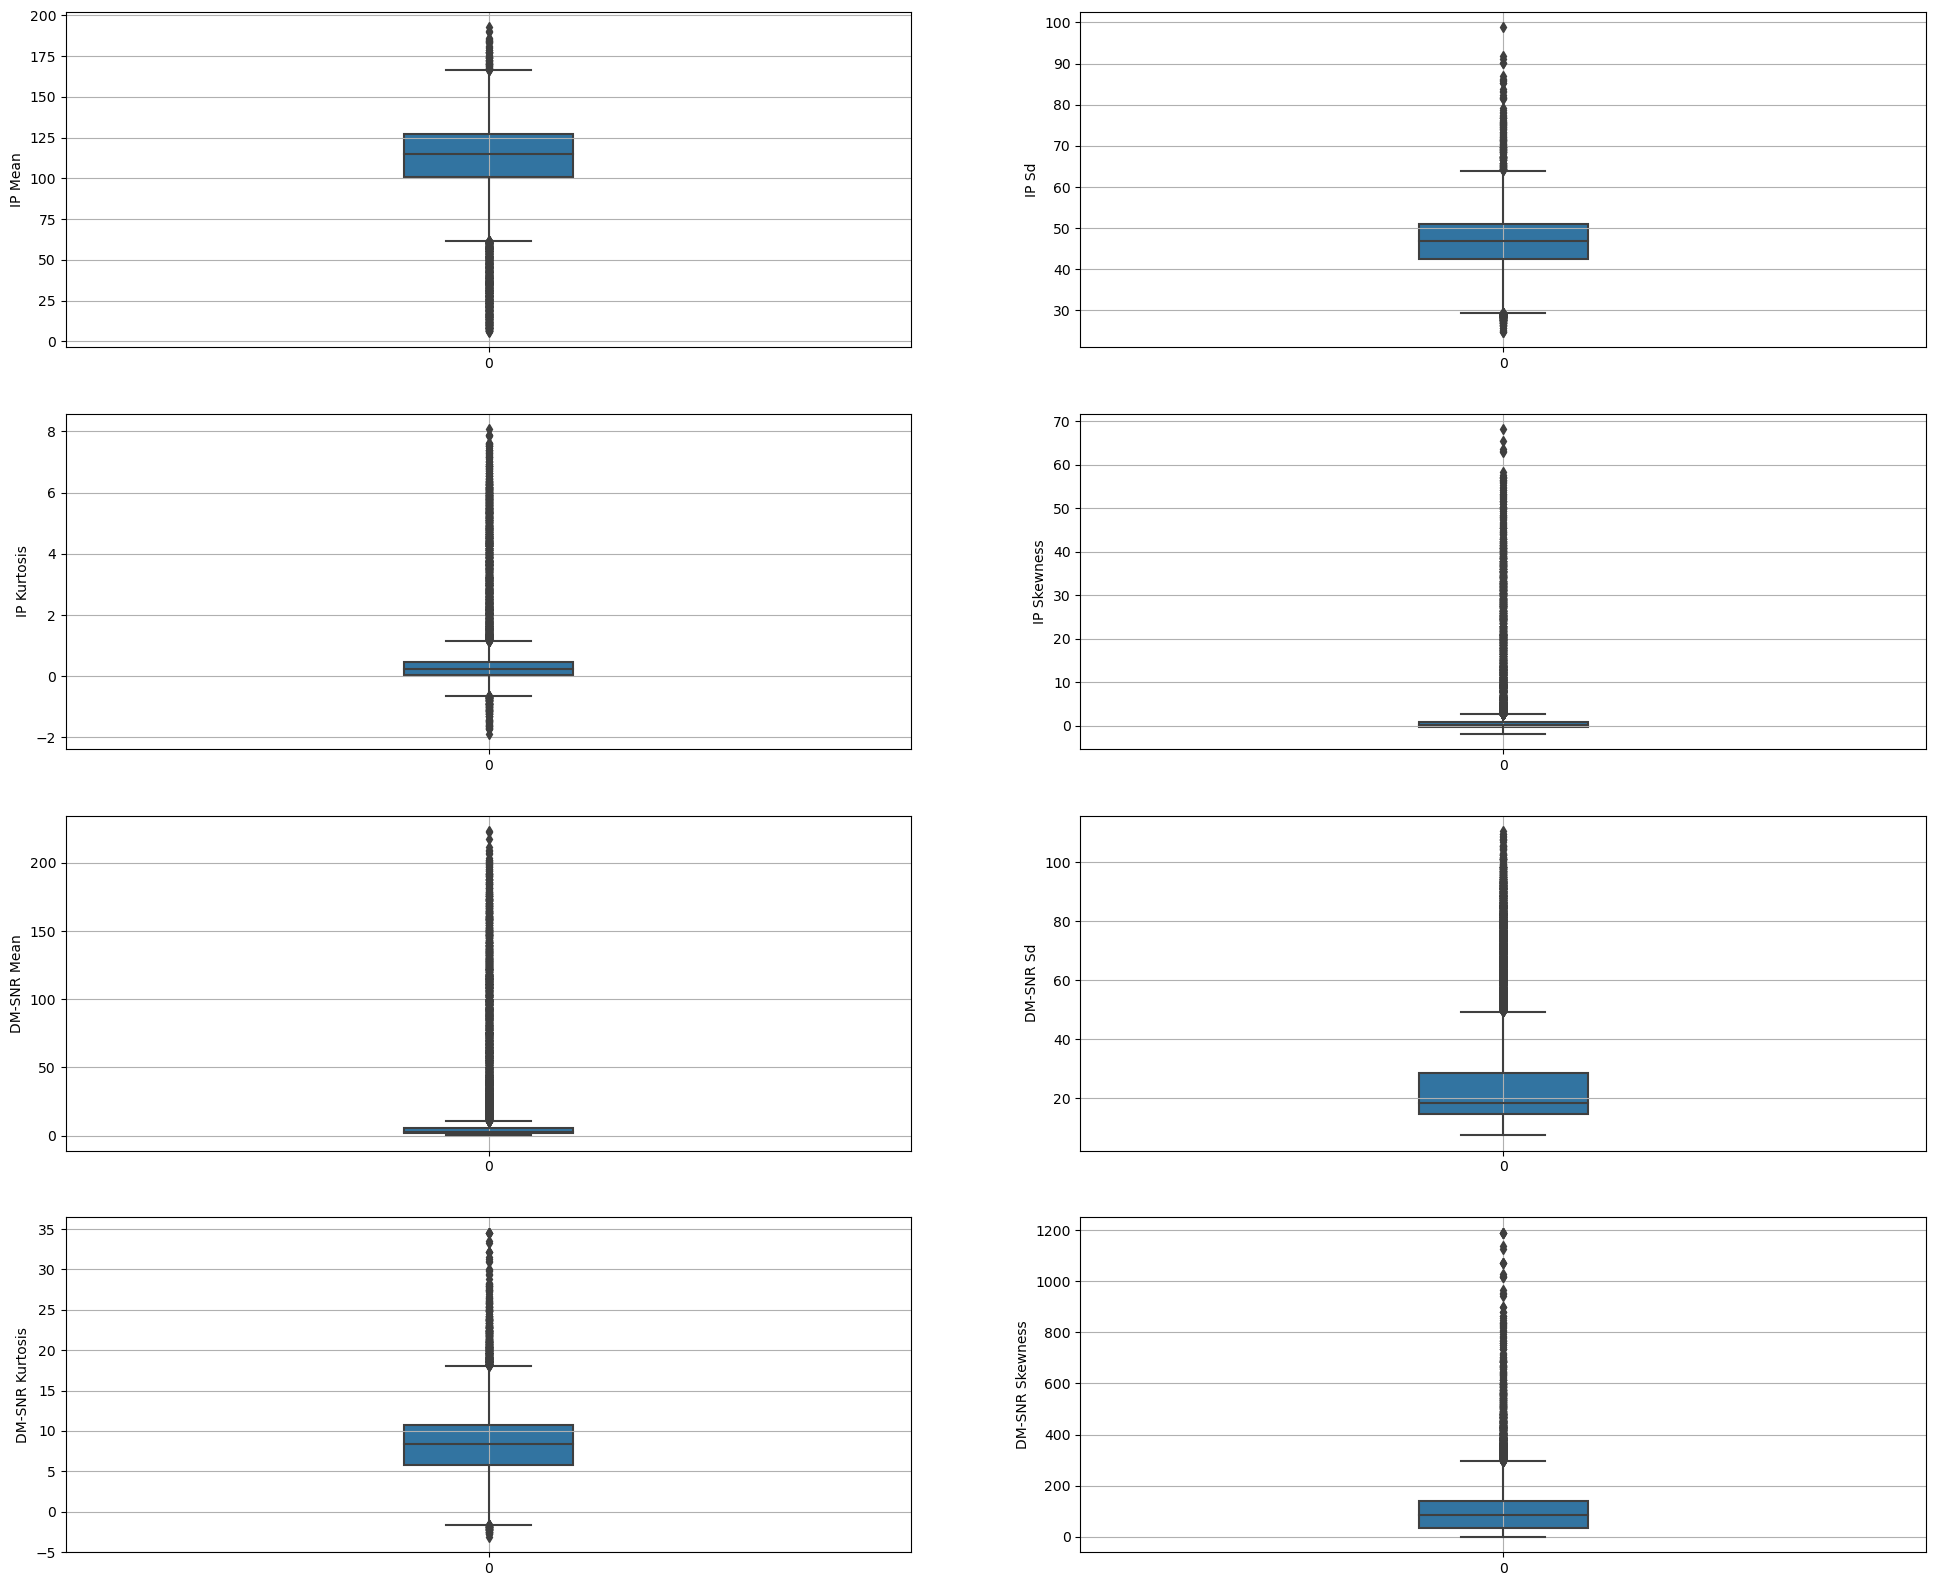

In [76]:
# Drawing boxplots to visualize outliers

plt.figure(figsize = (24, 20))

plt.subplot(421)
fig = sns.boxplot(df['IP Mean'], width = 0.2)
fig.set_title('')
fig.set_ylabel('IP Mean')
plt.grid()


plt.subplot(422)
fig = sns.boxplot(df['IP Sd'], width = 0.2)
fig.set_title('')
fig.set_ylabel('IP Sd')
plt.grid()


plt.subplot(423)
fig = sns.boxplot(df['IP Kurtosis'], width = 0.2)
fig.set_title('')
fig.set_ylabel('IP Kurtosis')
plt.grid()


plt.subplot(424)
fig = sns.boxplot(df['IP Skewness'], width = 0.2)
fig.set_title('')
fig.set_ylabel('IP Skewness')
plt.grid()


plt.subplot(425)
fig = sns.boxplot(df['DM-SNR Mean'], width = 0.2)
fig.set_title('')
fig.set_ylabel('DM-SNR Mean')
plt.grid()


plt.subplot(426)
fig= sns.boxplot(df['DM-SNR Sd'], width = 0.2)
fig.set_title('')
fig.set_ylabel('DM-SNR Sd')
plt.grid()


plt.subplot(427)
fig = sns.boxplot(df['DM-SNR Kurtosis'], width = 0.2)
fig.set_title('')
fig.set_ylabel('DM-SNR Kurtosis')
plt.grid()


plt.subplot(428)
fig = sns.boxplot(df['DM-SNR Skewness'], width = 0.2)
fig.set_title('')
fig.set_ylabel('DM-SNR Skewness');
plt.grid()

The above boxplots confirm that there are lot of outliers in these variables.

Since the dataset contains outliers, so the value of C parameter should be high while training the model.

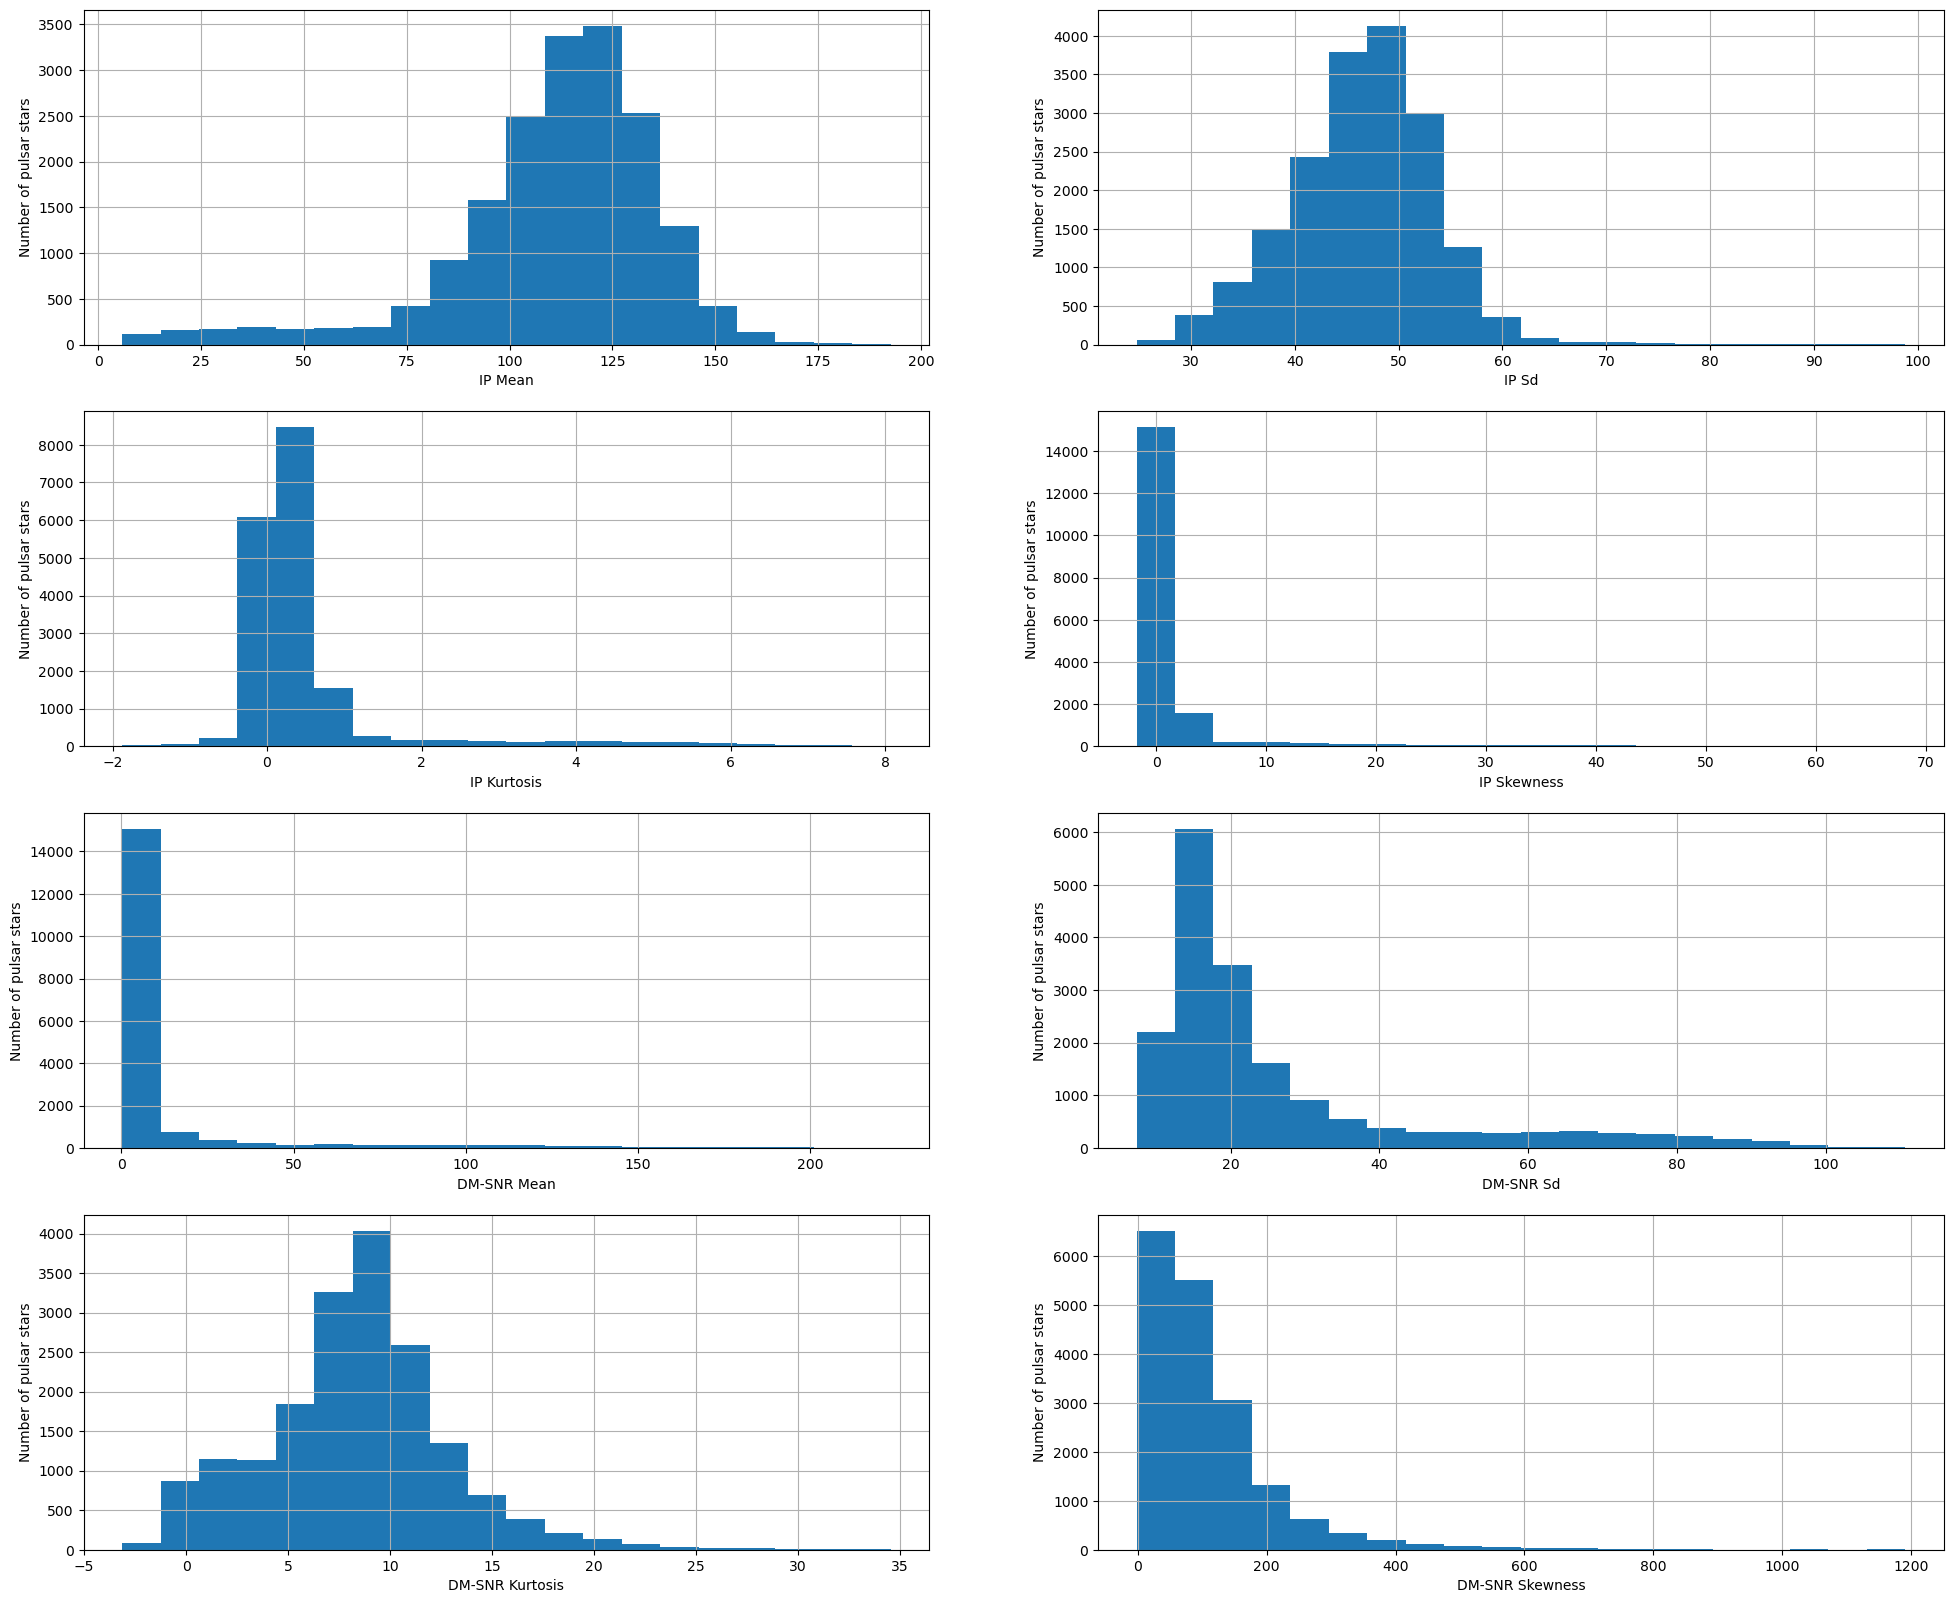

In [96]:
#Checking distribution of variables

# plotting histogram to check distribution
plt.figure(figsize=(24,20))


plt.subplot(4, 2, 1)
fig = df['IP Mean'].hist(bins=20)
fig.set_xlabel('IP Mean')
fig.set_ylabel('Number of pulsar stars')


plt.subplot(4, 2, 2)
fig = df['IP Sd'].hist(bins=20)
fig.set_xlabel('IP Sd')
fig.set_ylabel('Number of pulsar stars')

plt.subplot(4, 2, 3)
fig = df['IP Kurtosis'].hist(bins=20)
fig.set_xlabel('IP Kurtosis')
fig.set_ylabel('Number of pulsar stars')



plt.subplot(4, 2, 4)
fig = df['IP Skewness'].hist(bins=20)
fig.set_xlabel('IP Skewness')
fig.set_ylabel('Number of pulsar stars')



plt.subplot(4, 2, 5)
fig = df['DM-SNR Mean'].hist(bins=20)
fig.set_xlabel('DM-SNR Mean')
fig.set_ylabel('Number of pulsar stars')

plt.subplot(4, 2, 6)
fig = df['DM-SNR Sd'].hist(bins=20)
fig.set_xlabel('DM-SNR Sd')
fig.set_ylabel('Number of pulsar stars')



plt.subplot(4, 2, 7)
fig = df['DM-SNR Kurtosis'].hist(bins=20)
fig.set_xlabel('DM-SNR Kurtosis')
fig.set_ylabel('Number of pulsar stars')


plt.subplot(4, 2, 8)
fig = df['DM-SNR Skewness'].hist(bins=20)
fig.set_xlabel('DM-SNR Skewness')
fig.set_ylabel('Number of pulsar stars');

We can see that all the 8 continuous variables are skewed.

In [97]:
# Declare Feature Vectors and Target Variable

In [98]:
X = df.drop(['target_class'], axis = 1)

y = df['target_class']

In [102]:
# Split data into separate training and test set ¶


In [103]:
# split X and y into training and testing sets

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [104]:
# check the shape of X_train and X_test

X_train.shape, X_test.shape

((14318, 8), (3580, 8))

In [105]:
#Feature Scaling

In [106]:
#Checking statistics
X_train.describe()

,IP Mean,IP Sd,IP Kurtosis,IP Skewness,DM-SNR Mean,DM-SNR Sd,DM-SNR Kurtosis,DM-SNR Skewness
count,14318.000000,14318.000000,14318.000000,14318.000000,14318.000000,14318.000000,14318.000000,14318.000000
mean,110.858759,46.565693,0.488399,1.818893,12.912853,26.460878,8.273167,104.431502
std,25.940464,6.851364,1.081679,6.286338,29.960088,19.613404,4.514452,106.050504
min,6.179688,24.772042,-1.876011,-1.791886,0.213211,7.370432,-2.812353,-1.976976
25%,100.751953,42.407421,0.028028,-0.185156,1.933110,14.447192,5.726638,34.148027
50%,114.976562,46.966254,0.223053,0.198242,2.809783,18.483441,8.416290,82.595021
75%,127.115234,51.019621,0.477569,0.926502,5.531773,28.576960,10.694074,138.962644
max,192.617188,98.778911,8.069522,68.101622,223.392141,110.642211,34.539844,1191.000837


In [107]:
cols = X_train.columns

In [108]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)

X_test = scaler.transform(X_test)

In [110]:
X_train = pd.DataFrame(X_train, columns = [cols])
X_test = pd.DataFrame(X_test, columns = [cols])

In [111]:
X_train.describe()

,IP Mean,IP Sd,IP Kurtosis,IP Skewness,DM-SNR Mean,DM-SNR Sd,DM-SNR Kurtosis,DM-SNR Skewness
count,1.431800e+04,1.431800e+04,1.431800e+04,1.431800e+04,1.431800e+04,1.431800e+04,1.431800e+04,1.431800e+04
mean,1.908113e-16,-6.550610e-16,1.042143e-17,3.870815e-17,-8.734147e-17,-1.617802e-16,-1.513588e-17,1.122785e-16
std,1.000035e+00,1.000035e+00,1.000035e+00,1.000035e+00,1.000035e+00,1.000035e+00,1.000035e+00,1.000035e+00
min,-4.035499e+00,-3.181033e+00,-2.185946e+00,-5.744051e-01,-4.239001e-01,-9.733707e-01,-2.455649e+00,-1.003411e+00
25%,-3.896291e-01,-6.069473e-01,-4.256221e-01,-3.188054e-01,-3.664918e-01,-6.125457e-01,-5.641035e-01,-6.627590e-01
50%,1.587461e-01,5.846646e-02,-2.453172e-01,-2.578142e-01,-3.372294e-01,-4.067482e-01,3.170446e-02,-2.059136e-01
75%,6.267059e-01,6.501017e-01,-1.001238e-02,-1.419621e-01,-2.463724e-01,1.078934e-01,5.362759e-01,3.256217e-01
max,3.151882e+00,7.621116e+00,7.008906e+00,1.054430e+01,7.025568e+00,4.292181e+00,5.818557e+00,1.024613e+01


In [114]:
# Run SVM with default hyperparameters
# Default hyperparameter means C=1.0, kernel=rbf and gamma=auto among other parameters.

In [117]:
# import SVC classifier
from sklearn.svm import SVC

# import metrics to compute accuracy
from sklearn.metrics import accuracy_score

# instantiate classifier with default hyperparameters
svc=SVC()

# fit classifier to training set
svc.fit(X_train, y_train)

# making predictions on test set
y_pred = svc.predict(X_test)

# Computing accuracy score
print('Model accuracy score with default hyperparameters: {0:0.4f}'.format(accuracy_score(y_test, y_pred)))

Model accuracy score with default hyperparameters: 0.9827


In [118]:
# Run SVM with rbf kernel and C=100.0

In [119]:
# instantiate classifier with rbf kernel and C=100
svc=SVC(C=100.0) 


# fit classifier to training set
svc.fit(X_train,y_train)


# make predictions on test set
y_pred=svc.predict(X_test)


# compute and print accuracy score
print('Model accuracy score with rbf kernel and C=100.0 : {0:0.4f}'. format(accuracy_score(y_test, y_pred)))

Model accuracy score with rbf kernel and C=100.0 : 0.9832


We can see that we obtain a higher accuracy with C=100.0 as higher C means less outliers.
Now, I will further increase the value of C=1000.0 and check accuracy.


In [120]:
# Run SVM with rbf kernel and C=1000.0

In [121]:
# instantiate classifier with rbf kernel and C=1000
svc=SVC(C=1000.0) 


# fit classifier to training set
svc.fit(X_train,y_train)


# make predictions on test set
y_pred=svc.predict(X_test)


# compute and print accuracy score
print('Model accuracy score with rbf kernel and C=1000.0 : {0:0.4f}'. format(accuracy_score(y_test, y_pred)))

Model accuracy score with rbf kernel and C=1000.0 : 0.9816


 In this case, we can see that the accuracy had decreased with C=1000.0

In [122]:
# Run SVM with linear kernel

In [ ]:
# Run SVM with linear kernel and C=1.0

In [124]:
#instantiate classifier with linear kernel and C=1.0

linear_svc = SVC(kernel = 'linear')

#fit classifier to training set
linear_svc.fit(X_train, y_train)

# Make predictions on test set
y_pred_lin = linear_svc.predict(X_test)

# compute and print accuracy score
print('Model accuracy score with linear kernel and C=1.0 : {0:0.4f}'. format(accuracy_score(y_test, y_pred_lin)))

Model accuracy score with linear kernel and C=1.0 : 0.9830


In [125]:
# Run SVM with linear kernel and C=100.0

In [126]:
# instantiate classifier with linear kernel and C=100.0
linear_svc100=SVC(kernel='linear', C=100.0) 


# fit classifier to training set
linear_svc100.fit(X_train, y_train)


# make predictions on test set
y_pred=linear_svc100.predict(X_test)


# compute and print accuracy score
print('Model accuracy score with linear kernel and C=100.0 : {0:0.4f}'. format(accuracy_score(y_test, y_pred)))

Model accuracy score with linear kernel and C=100.0 : 0.9832


In [127]:
# instantiate classifier with linear kernel and C=1000.0
linear_svc1000=SVC(kernel='linear', C=1000.0) 


# fit classifier to training set
linear_svc1000.fit(X_train, y_train)


# make predictions on test set
y_pred=linear_svc1000.predict(X_test)


# compute and print accuracy score
print('Model accuracy score with linear kernel and C=1000.0 : {0:0.4f}'. format(accuracy_score(y_test, y_pred)))

Model accuracy score with linear kernel and C=1000.0 : 0.9832


We can see that we can obtain higher accuracy with C=100.0 and C=1000.0 as compared to C=1.0.

In [128]:
# Compare the train-set and test-set accuracy

In [130]:
y_pred_train = linear_svc.predict(X_train)
print('Test-set accuracy score: {0:0.4f}'. format(accuracy_score(y_test, y_pred)))
print('Training-set accuracy score: {0:0.4f}'. format(accuracy_score(y_train, y_pred_train)))

Test-set accuracy score: 0.9832
Training-set accuracy score: 0.9783


The training-set accuracy score is 0.9783 while the test-set accuracy to be 0.9830. These two values are quite comparable. So, there is no question of overfitting.

In [132]:
# Run SVM with polynomial kernel

In [ ]:
# Run SVM with polynomial kernel and C = 1.0

In [133]:
# instantiate classifier with polynomial kernel and C=1.0
poly_svc=SVC(kernel='poly', C=1.0) 


# fit classifier to training set
poly_svc.fit(X_train,y_train)


# make predictions on test set
y_pred=poly_svc.predict(X_test)


# compute and print accuracy score
print('Model accuracy score with polynomial kernel and C=1.0 : {0:0.4f}'. format(accuracy_score(y_test, y_pred)))           


Model accuracy score with polynomial kernel and C=1.0 : 0.9807


In [ ]:
# Run SVM with polynomial kernel and C=100.0

In [134]:
# instantiate classifier with polynomial kernel and C=100.0
poly_svc100=SVC(kernel='poly', C=100.0) 


# fit classifier to training set
poly_svc100.fit(X_train, y_train)


# make predictions on test set
y_pred=poly_svc100.predict(X_test)


# compute and print accuracy score
print('Model accuracy score with polynomial kernel and C=1.0 : {0:0.4f}'. format(accuracy_score(y_test, y_pred)))

Model accuracy score with polynomial kernel and C=1.0 : 0.9824


Polynomial kernel gives poor performance. It may be overfitting the training set.

In [135]:
# Run SVM with sigmoid kernel

In [136]:
# Run SVM with sigmoid kernel and C=1.0

In [137]:
# instantiate classifier with sigmoid kernel and C=1.0
sigmoid_svc=SVC(kernel='sigmoid', C=1.0) 


# fit classifier to training set
sigmoid_svc.fit(X_train,y_train)


# make predictions on test set
y_pred=sigmoid_svc.predict(X_test)


# compute and print accuracy score
print('Model accuracy score with sigmoid kernel and C=1.0 : {0:0.4f}'. format(accuracy_score(y_test, y_pred)))

Model accuracy score with sigmoid kernel and C=1.0 : 0.8858


In [138]:
# Run SVM with sigmoid kernel and C=100.0

In [139]:
# instantiate classifier with sigmoid kernel and C=100.0
sigmoid_svc100=SVC(kernel='sigmoid', C=100.0) 


# fit classifier to training set
sigmoid_svc100.fit(X_train,y_train)


# make predictions on test set
y_pred=sigmoid_svc100.predict(X_test)


# compute and print accuracy score
print('Model accuracy score with sigmoid kernel and C=100.0 : {0:0.4f}'. format(accuracy_score(y_test, y_pred)))


Model accuracy score with sigmoid kernel and C=100.0 : 0.8855


We can see that sigmoid kernel is also performing poorly

We get maximum accuracy with rbf and linear kernel with C=100.0. and the accuracy is 0.9832. Based on the above analysis we can conclude that our classification model accuracy is very good. Our model is doing a very good job in terms of predicting the class labels.

But, this is not true. Here, we have an imbalanced dataset. The problem is that accuracy is an inadequate measure for quantifying predictive performance in the imbalanced dataset problem.

So, we must explore alternative metrices that provide better guidance in selecting models. In particular, we would like to know the underlying distribution of values and the type of errors our classifer is making.

One such metric to analyze the model performance in imbalanced classes problem is Confusion matrix.



In [140]:
#  Confusion matrix

In [142]:
# Print the Confusion Matrix and slice it into four pieces

from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred_lin)

print('Confusion matrix\n\n', cm)

print('\nTrue Positives(TP) = ', cm[0,0])

print('\nTrue Negatives(TN) = ', cm[1,1])

print('\nFalse Positives(FP) = ', cm[0,1])

print('\nFalse Negatives(FN) = ', cm[1,0])

Confusion matrix

 [[3289   17]
 [  44  230]]

True Positives(TP) =  3289

True Negatives(TN) =  230

False Positives(FP) =  17

False Negatives(FN) =  44


The confusion matrix shows 3289 + 230 = 3519 correct predictions and 17 + 44 = 61 incorrect predictions.

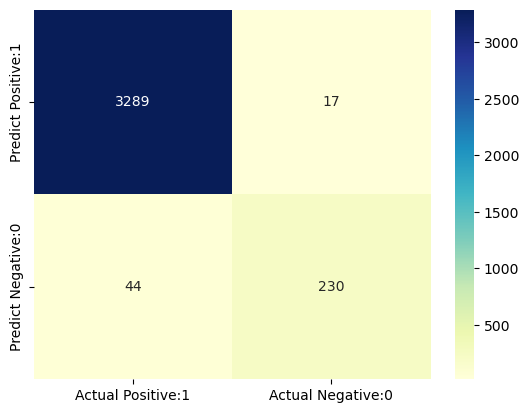

In [145]:
# visualize confusion matrix with seaborn heatmap

cm_matrix = pd.DataFrame(data=cm, columns=['Actual Positive:1', 'Actual Negative:0'], 
                                 index=['Predict Positive:1', 'Predict Negative:0'])

sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='YlGnBu');

In [146]:
# Classification metrices

Classification report is another way to evaluate the classification model performance. It displays the precision, recall, f1 and support scores for the model.

In [147]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred_lin))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99      3306
           1       0.93      0.84      0.88       274

    accuracy                           0.98      3580
   macro avg       0.96      0.92      0.94      3580
weighted avg       0.98      0.98      0.98      3580



# ROC - AUC

Another tool to measure the classification model performance visually is ROC Curve. ROC Curve stands for Receiver Operating Characteristic Curve. An ROC Curve is a plot which shows the performance of a classification model at various classification threshold levels.

ROC AUC stands for Receiver Operating Characteristic - Area Under Curve. It is a technique to compare classifier performance. In this technique, we measure the area under the curve (AUC). A perfect classifier will have a ROC AUC equal to 1, whereas a purely random classifier will have a ROC AUC equal to 0.5.

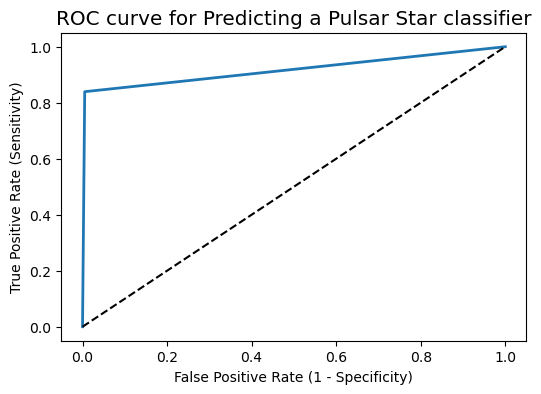

In [151]:
# plotting ROC Curve

from sklearn.metrics import roc_curve

fpr, tpr, thresholds = roc_curve(y_test, y_pred_lin)

plt.figure(figsize=(6,4))

plt.plot(fpr, tpr, linewidth=2)

plt.plot([0,1], [0,1], 'k--' )

plt.rcParams['font.size'] = 12

plt.title('ROC curve for Predicting a Pulsar Star classifier')

plt.xlabel('False Positive Rate (1 - Specificity)')

plt.ylabel('True Positive Rate (Sensitivity)')

plt.show()

In [153]:
# compute ROC AUC

from sklearn.metrics import roc_auc_score

ROC_AUC = roc_auc_score(y_test, y_pred_lin)

print('ROC AUC : {:.4f}'.format(ROC_AUC))

ROC AUC : 0.9171


In [154]:
# Stratified k-fold Cross Validation with shuffle split

k-fold cross-validation is a very useful technique to evaluate model performance. But, it fails here because we have a imbalnced dataset. So, in the case of imbalanced dataset, I will use another technique to evaluate model performance. It is called stratified k-fold cross-validation.

In stratified k-fold cross-validation, we split the data such that the proportions between classes are the same in each fold as they are in the whole dataset.

In [156]:
from sklearn.model_selection import cross_val_score

from sklearn.model_selection import KFold


kfold=KFold(n_splits=5, shuffle=True, random_state=0)


linear_svc=SVC(kernel='linear')


linear_scores = cross_val_score(linear_svc, X, y, cv=kfold)

# print cross-validation scores with linear kernel

print('Stratified cross-validation scores with linear kernel:\n\n{}'.format(linear_scores))

Stratified cross-validation scores with linear kernel:

[0.98296089 0.97458101 0.97988827 0.97876502 0.97848561]


In [157]:
# print average cross-validation score with linear kernel

print('Average stratified cross-validation score with linear kernel:{:.4f}'.format(linear_scores.mean()))

Average stratified cross-validation score with linear kernel:0.9789


I obtain higher average stratified k-fold cross-validation score of 0.9789 with linear kernel but the model accuracy is 0.9832. So, stratified cross-validation technique does not help to improve the model performance.

[SKIPPED] Hyperparameter Optimization using GridSearch CV

In [158]:
# Results and conclusion

1. There are outliers in our dataset. So, as I increase the value of C to limit fewer outliers, the accuracy increased. This is true with different kinds of kernels.

2. We get maximum accuracy with rbf and linear kernel with C=100.0 and the accuracy is 0.9832. So, we can conclude that our model is doing a very good job in terms of predicting the class labels. But, this is not true. Here, we have an imbalanced dataset. Accuracy is an inadequate measure for quantifying predictive performance in the imbalanced dataset problem. So, we must explore confusion matrix that provide better guidance in selecting models.

3. ROC AUC of our model is very close to 1. So, we can conclude that our classifier does a good job in classifying the pulsar star.

4. I obtain higher average stratified k-fold cross-validation score of4 0.9789 with linear kernel but the model accuracy is 0.9832. So, stratified cross-validation technique does not help to improve the model performance.

<!-- Our original model test accuracy is 0.9832 while GridSearch CV score on test-set is 0.9835. So, GridSearch CV helps to identify the parameters that will improve the performance for this particular model. -->